# Jerrin Redmon
# Caleb Puckett

# Pokemon Dataset

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import statsmodels.api as sm

In [2]:
pokemonList = ('pokemon_data.csv')
pokemonStats = ('stats.csv')
pokemonAbility = ('ability.csv')

In [3]:
def data_merge(filename):
    dataset = pd.read_csv(filename)
    pokemon_dataset = pd.DataFrame(dataset)
    return pokemon_dataset

In [4]:
List = data_merge(pokemonList)

In [5]:
Stats = data_merge(pokemonStats)

In [6]:
Ability = data_merge(pokemonAbility)

In [7]:
List.head()

,Unnamed: 0,pokedex_nr,en_name,type_1,type_2,link,type_list,de_name,type_1_german,type_2_german,type_list_ger,fr_name,jp_name,kor_name,chi_name
0,0,1,Bulbasaur,Grass,Poison,https://www.pokewiki.de/Bisasam,"['Grass', 'Poison']",Bisasam,Pflanze,Gift,"['Pflanze', 'Gift']",Bulbizarre,フシギダネ(Fushigidane),이상해씨(Isanghaessi),妙蛙種子 / 妙蛙种子(Miàowāzhǒngzǐ)
1,1,2,Ivysaur,Grass,Poison,https://www.pokewiki.de/Bisaknosp,"['Grass', 'Poison']",Bisaknosp,Pflanze,Gift,"['Pflanze', 'Gift']",Herbizarre,フシギソウ(Fushigisou),이상해풀(Isanghaepul),妙蛙草 / 妙蛙草(Miàowācǎo)
2,2,3,Venusaur,Grass,Poison,https://www.pokewiki.de/Bisaflor,"['Grass', 'Poison']",Bisaflor,Pflanze,Gift,"['Pflanze', 'Gift']",Florizarre,フシギバナ(Fushigibana),이상해꽃(Isanghaekkot),妙蛙花 / 妙蛙花(Miàowāhuā)
3,3,4,Charmander,Fire,NaN,https://www.pokewiki.de/Glumanda,['Fire'],Glumanda,Feuer,NaN,['Feuer'],Salamèche,ヒトカゲ(Hitokage),파이리(Pairi),小火龍 / 小火龙(Xiǎohuǒlóng)
4,4,5,Charmeleon,Fire,NaN,https://www.pokewiki.de/Glutexo,['Fire'],Glutexo,Feuer,NaN,['Feuer'],Reptincel,リザード(Lizardo),리자드(Rijadeu),火恐龍 / 火恐龙(Huǒkǒnglóng)


In [8]:
new_list = List.drop(['Unnamed: 0', 'link', 'type_1_german', 'type_2_german', 'type_list_ger'], axis = 1)

In [9]:
Stats.head()

,pokedex_nr,"('base_stat', 'attack')","('base_stat', 'defense')","('base_stat', 'hp')","('base_stat', 'special-attack')","('base_stat', 'special-defense')","('base_stat', 'speed')","('effort', 'attack')","('effort', 'defense')","('effort', 'hp')","('effort', 'special-attack')","('effort', 'special-defense')","('effort', 'speed')"
0,1,49.0,49.0,45.0,65.0,65.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,62.0,63.0,60.0,80.0,80.0,60.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3,82.0,83.0,80.0,100.0,100.0,80.0,0.0,0.0,0.0,2.0,1.0,0.0
3,4,52.0,43.0,39.0,60.0,50.0,65.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,64.0,58.0,58.0,80.0,65.0,80.0,0.0,0.0,0.0,1.0,0.0,1.0


In [10]:
new_stats = Stats.drop(['pokedex_nr'], axis = 1)

In [11]:
Ability.head()

,Unnamed: 0,is_hidden,slot,ability.name,ability.url,pokedex_nr
0,0,False,1,overgrow,https://pokeapi.co/api/v2/ability/65/,1
1,1,True,3,chlorophyll,https://pokeapi.co/api/v2/ability/34/,1
2,2,False,1,overgrow,https://pokeapi.co/api/v2/ability/65/,2
3,3,True,3,chlorophyll,https://pokeapi.co/api/v2/ability/34/,2
4,4,False,1,overgrow,https://pokeapi.co/api/v2/ability/65/,3


In [12]:
new_ability = Ability.drop(['Unnamed: 0', 'ability.url'], axis = 1)

In [13]:
pokemon = pd.concat([new_list, new_stats], axis = 1)

In [14]:
pokemon

,pokedex_nr,en_name,type_1,type_2,type_list,de_name,fr_name,jp_name,kor_name,chi_name,...,"('base_stat', 'hp')","('base_stat', 'special-attack')","('base_stat', 'special-defense')","('base_stat', 'speed')","('effort', 'attack')","('effort', 'defense')","('effort', 'hp')","('effort', 'special-attack')","('effort', 'special-defense')","('effort', 'speed')"
0,1,Bulbasaur,Grass,Poison,"['Grass', 'Poison']",Bisasam,Bulbizarre,フシギダネ(Fushigidane),이상해씨(Isanghaessi),妙蛙種子 / 妙蛙种子(Miàowāzhǒngzǐ),...,45.0,65.0,65.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,Ivysaur,Grass,Poison,"['Grass', 'Poison']",Bisaknosp,Herbizarre,フシギソウ(Fushigisou),이상해풀(Isanghaepul),妙蛙草 / 妙蛙草(Miàowācǎo),...,60.0,80.0,80.0,60.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3,Venusaur,Grass,Poison,"['Grass', 'Poison']",Bisaflor,Florizarre,フシギバナ(Fushigibana),이상해꽃(Isanghaekkot),妙蛙花 / 妙蛙花(Miàowāhuā),...,80.0,100.0,100.0,80.0,0.0,0.0,0.0,2.0,1.0,0.0
3,4,Charmander,Fire,NaN,['Fire'],Glumanda,Salamèche,ヒトカゲ(Hitokage),파이리(Pairi),小火龍 / 小火龙(Xiǎohuǒlóng),...,39.0,60.0,50.0,65.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,Charmeleon,Fire,NaN,['Fire'],Glutexo,Reptincel,リザード(Lizardo),리자드(Rijadeu),火恐龍 / 火恐龙(Huǒkǒnglóng),...,58.0,80.0,65.0,80.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,901,Ursaluna,Ground,Normal,"['Ground', 'Normal']",Ursaluna,Ursaking,ガチグマ(Gachiguma)?,다투곰(Datugom),月月熊 / 月月熊(Yuèyuèxióng),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,902,Basculegion,Water,Ghost,"['Water', 'Ghost']",Salmagnis,Paragruel,イダイトウ(Idaitō)?,대쓰여너(Daesseuyeoneo),幽尾玄魚 / 幽尾玄鱼(Yōuwěixuányú),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,903,Sneasler,Fight,Poison,"['Fight', 'Poison']",Snieboss,Farfurex,オオニューラ(Ōnyula)?,포푸니크(Popunikeu),大狃拉 / 大狃拉(Dàniǔlā),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,904,Overqwil,Dark,Poison,"['Dark', 'Poison']",Myriador,Qwilpik,ハリーマン(Haryman)?,장침바루(Jangchimbaru),萬針魚 / 万针鱼(Wànzhēnyú),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
new_ability

,is_hidden,slot,ability.name,pokedex_nr
0,False,1,overgrow,1
1,True,3,chlorophyll,1
2,False,1,overgrow,2
3,True,3,chlorophyll,2
4,False,1,overgrow,3
...,...,...,...,...
2134,False,1,transistor,894
2135,False,1,dragons-maw,895
2136,False,1,chilling-neigh,896
2137,False,1,grim-neigh,897


In [16]:
pokemon.columns

Index(['pokedex_nr', 'en_name', 'type_1', 'type_2', 'type_list', 'de_name',
       'fr_name', 'jp_name', 'kor_name', 'chi_name', '('base_stat', 'attack')',
       '('base_stat', 'defense')', '('base_stat', 'hp')',
       '('base_stat', 'special-attack')', '('base_stat', 'special-defense')',
       '('base_stat', 'speed')', '('effort', 'attack')',
       '('effort', 'defense')', '('effort', 'hp')',
       '('effort', 'special-attack')', '('effort', 'special-defense')',
       '('effort', 'speed')'],
      dtype='object')

In [17]:
og_columns=pokemon.columns

In [54]:
new_columns=['pokedex_number', 'english_name', 'type_1', 'type_2', 
             'type_list', 'german_name', 'french_name', 'japanese_name',
            'korean_name', 'chinese_name', "('base_stat', 'attack')",
       "('base_stat', 'defense')", "('base_stat', 'hp')",
       "('base_stat', 'special-attack')", "('base_stat', 'special-defense')",
       "('base_stat', 'speed')", "('effort', 'attack')",
       "('effort', 'defense')", "('effort', 'hp')",
       "('effort', 'special-attack')", "('effort', 'special-defense')",
       "('effort', 'speed')"]

In [22]:
new_columns

['pokedex_number',
 'english_name',
 'type_1',
 'type_2',
 'type_list',
 'german_name',
 'french_name',
 'japanese_name',
 'korean_name',
 'chinese_name',
 "('base_stat', 'attack')",
 "('base_stat', 'defense')",
 "('base_stat', 'hp')",
 "('base_stat', 'special-attack')",
 "('base_stat', 'special-defense')",
 "('base_stat', 'speed')",
 "('effort', 'attack')",
 "('effort', 'defense')",
 "('effort', 'hp')",
 "('effort', 'special-attack')",
 "('effort', 'special-defense')",
 "('effort', 'speed')"]

In [55]:
pokemon.columns=new_columns

In [24]:
pokemon

,pokedex_number,english_name,type_1,type_2,type_list,german_name,french_name,japanese_name,korean_name,chinese_name,...,"('base_stat', 'hp')","('base_stat', 'special-attack')","('base_stat', 'special-defense')","('base_stat', 'speed')","('effort', 'attack')","('effort', 'defense')","('effort', 'hp')","('effort', 'special-attack')","('effort', 'special-defense')","('effort', 'speed')"
0,1,Bulbasaur,Grass,Poison,"['Grass', 'Poison']",Bisasam,Bulbizarre,フシギダネ(Fushigidane),이상해씨(Isanghaessi),妙蛙種子 / 妙蛙种子(Miàowāzhǒngzǐ),...,45.0,65.0,65.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,Ivysaur,Grass,Poison,"['Grass', 'Poison']",Bisaknosp,Herbizarre,フシギソウ(Fushigisou),이상해풀(Isanghaepul),妙蛙草 / 妙蛙草(Miàowācǎo),...,60.0,80.0,80.0,60.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3,Venusaur,Grass,Poison,"['Grass', 'Poison']",Bisaflor,Florizarre,フシギバナ(Fushigibana),이상해꽃(Isanghaekkot),妙蛙花 / 妙蛙花(Miàowāhuā),...,80.0,100.0,100.0,80.0,0.0,0.0,0.0,2.0,1.0,0.0
3,4,Charmander,Fire,NaN,['Fire'],Glumanda,Salamèche,ヒトカゲ(Hitokage),파이리(Pairi),小火龍 / 小火龙(Xiǎohuǒlóng),...,39.0,60.0,50.0,65.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,Charmeleon,Fire,NaN,['Fire'],Glutexo,Reptincel,リザード(Lizardo),리자드(Rijadeu),火恐龍 / 火恐龙(Huǒkǒnglóng),...,58.0,80.0,65.0,80.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,901,Ursaluna,Ground,Normal,"['Ground', 'Normal']",Ursaluna,Ursaking,ガチグマ(Gachiguma)?,다투곰(Datugom),月月熊 / 月月熊(Yuèyuèxióng),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,902,Basculegion,Water,Ghost,"['Water', 'Ghost']",Salmagnis,Paragruel,イダイトウ(Idaitō)?,대쓰여너(Daesseuyeoneo),幽尾玄魚 / 幽尾玄鱼(Yōuwěixuányú),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,903,Sneasler,Fight,Poison,"['Fight', 'Poison']",Snieboss,Farfurex,オオニューラ(Ōnyula)?,포푸니크(Popunikeu),大狃拉 / 大狃拉(Dàniǔlā),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,904,Overqwil,Dark,Poison,"['Dark', 'Poison']",Myriador,Qwilpik,ハリーマン(Haryman)?,장침바루(Jangchimbaru),萬針魚 / 万针鱼(Wànzhēnyú),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
pokemon.describe()

,pokedex_number,"('base_stat', 'attack')","('base_stat', 'defense')","('base_stat', 'hp')","('base_stat', 'special-attack')","('base_stat', 'special-defense')","('base_stat', 'speed')","('effort', 'attack')","('effort', 'defense')","('effort', 'hp')","('effort', 'special-attack')","('effort', 'special-defense')","('effort', 'speed')"
count,905.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,453.000000,76.544543,71.886414,69.031180,69.681514,69.876392,65.949889,0.496659,0.266147,0.233853,0.344098,0.220490,0.304009
std,261.395295,29.665559,29.536184,26.213707,29.372609,27.012142,28.456596,0.879907,0.645187,0.666854,0.797623,0.623171,0.684276
min,1.000000,5.000000,5.000000,1.000000,10.000000,20.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,227.000000,55.000000,50.000000,50.000000,46.250000,50.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,453.000000,75.000000,67.000000,65.000000,65.000000,65.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,679.000000,95.000000,90.000000,80.000000,90.000000,85.000000,85.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,905.000000,181.000000,230.000000,255.000000,173.000000,230.000000,200.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [28]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pokedex_number                    905 non-null    int64  
 1   english_name                      905 non-null    object 
 2   type_1                            905 non-null    object 
 3   type_2                            449 non-null    object 
 4   type_list                         905 non-null    object 
 5   german_name                       905 non-null    object 
 6   french_name                       905 non-null    object 
 7   japanese_name                     905 non-null    object 
 8   korean_name                       905 non-null    object 
 9   chinese_name                      905 non-null    object 
 10  ('base_stat', 'attack')           898 non-null    float64
 11  ('base_stat', 'defense')          898 non-null    float64
 12  ('base_s

In [30]:
pokemon.type_list.groupby(pokemon.type_list).count()

type_list
['Bug', 'Electric']      4
['Bug', 'Fairy']         2
['Bug', 'Fight']         3
['Bug', 'Fire']          2
['Bug', 'Flying']       13
                        ..
['Water', 'Poison']      3
['Water', 'Psychic']     5
['Water', 'Rock']        5
['Water', 'Steel']       1
['Water']               67
Name: type_list, Length: 178, dtype: int64

<AxesSubplot:xlabel='type_1'>

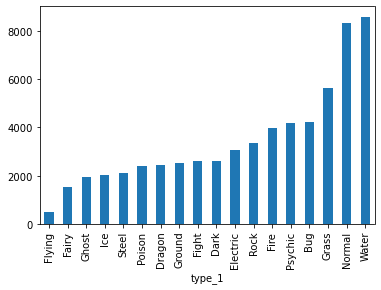

In [40]:
pokemon.groupby('type_1')["('base_stat', 'hp')"].sum().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='type_2'>

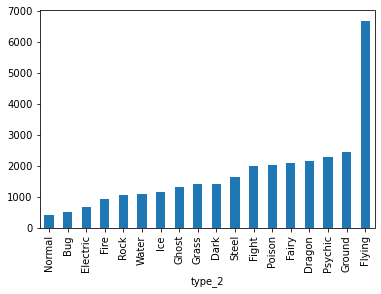

In [43]:
pokemon.groupby('type_2')["('base_stat', 'hp')"].sum().sort_values().plot(kind='bar')

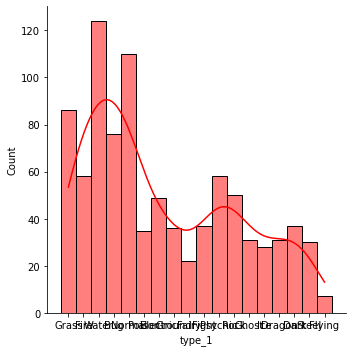

In [48]:
sns.displot(pokemon.type_1, color='red', bins=25, kde=True)

ConversionError: Failed to convert value(s) to axis units: 0      Poison
1      Poison
2      Poison
3         NaN
4         NaN
        ...  
900    Normal
901     Ghost
902    Poison
903    Poison
904    Flying
Name: x, Length: 905, dtype: object

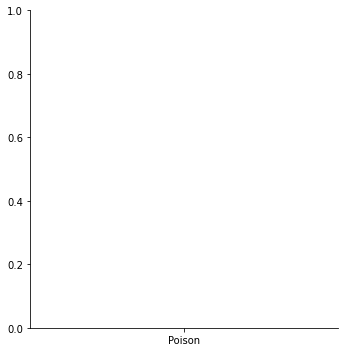

In [49]:
sns.displot(pokemon.type_2, color='blue', bins=25, kde=True)

<AxesSubplot:xlabel='pokedex_number', ylabel="('base_stat', 'hp')">

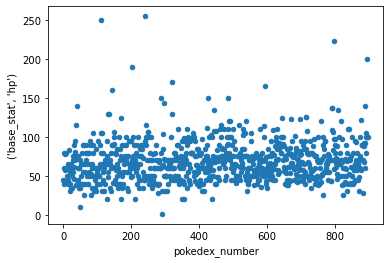

In [52]:
pokemon.plot.scatter(x="pokedex_number",y="('base_stat', 'hp')")

<AxesSubplot:xlabel='pokedex_number', ylabel="('base_stat', 'defense')">

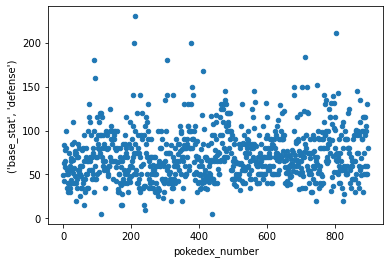

In [53]:
pokemon.plot.scatter(x="pokedex_number",y="('base_stat', 'defense')")

<AxesSubplot:xlabel="('base_stat', 'hp')", ylabel="('base_stat', 'defense')">

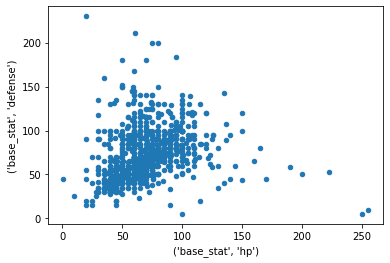

In [56]:
pokemon.plot.scatter(x="('base_stat', 'hp')", y="('base_stat', 'defense')")

In [64]:
pokemon.sort_values(ascending=False).plot(kind="pie",ylabel="",xlabel='type_list',figsize=(20,10)),plt.legend(loc='')

TypeError: sort_values() missing 1 required positional argument: 'by'

In [76]:
plot = pokemon.plot.pie(y="('base_stat', 'hp')", figsize=(5, 5)

SyntaxError: unexpected EOF while parsing (<ipython-input-76-7a85c844753c>, line 1)

In [66]:
pokemon.type_list.groupby(pokemon.type_list).count()

type_list
['Bug', 'Electric']      4
['Bug', 'Fairy']         2
['Bug', 'Fight']         3
['Bug', 'Fire']          2
['Bug', 'Flying']       13
                        ..
['Water', 'Poison']      3
['Water', 'Psychic']     5
['Water', 'Rock']        5
['Water', 'Steel']       1
['Water']               67
Name: type_list, Length: 178, dtype: int64

In [67]:
pokemon.type_1.groupby(pokemon.type_1).count()

type_1
Bug          76
Dark         37
Dragon       31
Electric     49
Fairy        22
Fight        37
Fire         58
Flying        7
Ghost        31
Grass        86
Ground       36
Ice          28
Normal      110
Poison       35
Psychic      58
Rock         50
Steel        30
Water       124
Name: type_1, dtype: int64

In [68]:
pokemon.type_2.groupby(pokemon.type_2).count()

type_2
Bug          9
Dark        19
Dragon      25
Electric     8
Fairy       33
Fight       25
Fire        13
Flying      96
Ghost       21
Grass       21
Ground      32
Ice         13
Normal       7
Poison      36
Psychic     33
Rock        16
Steel       24
Water       18
Name: type_2, dtype: int64

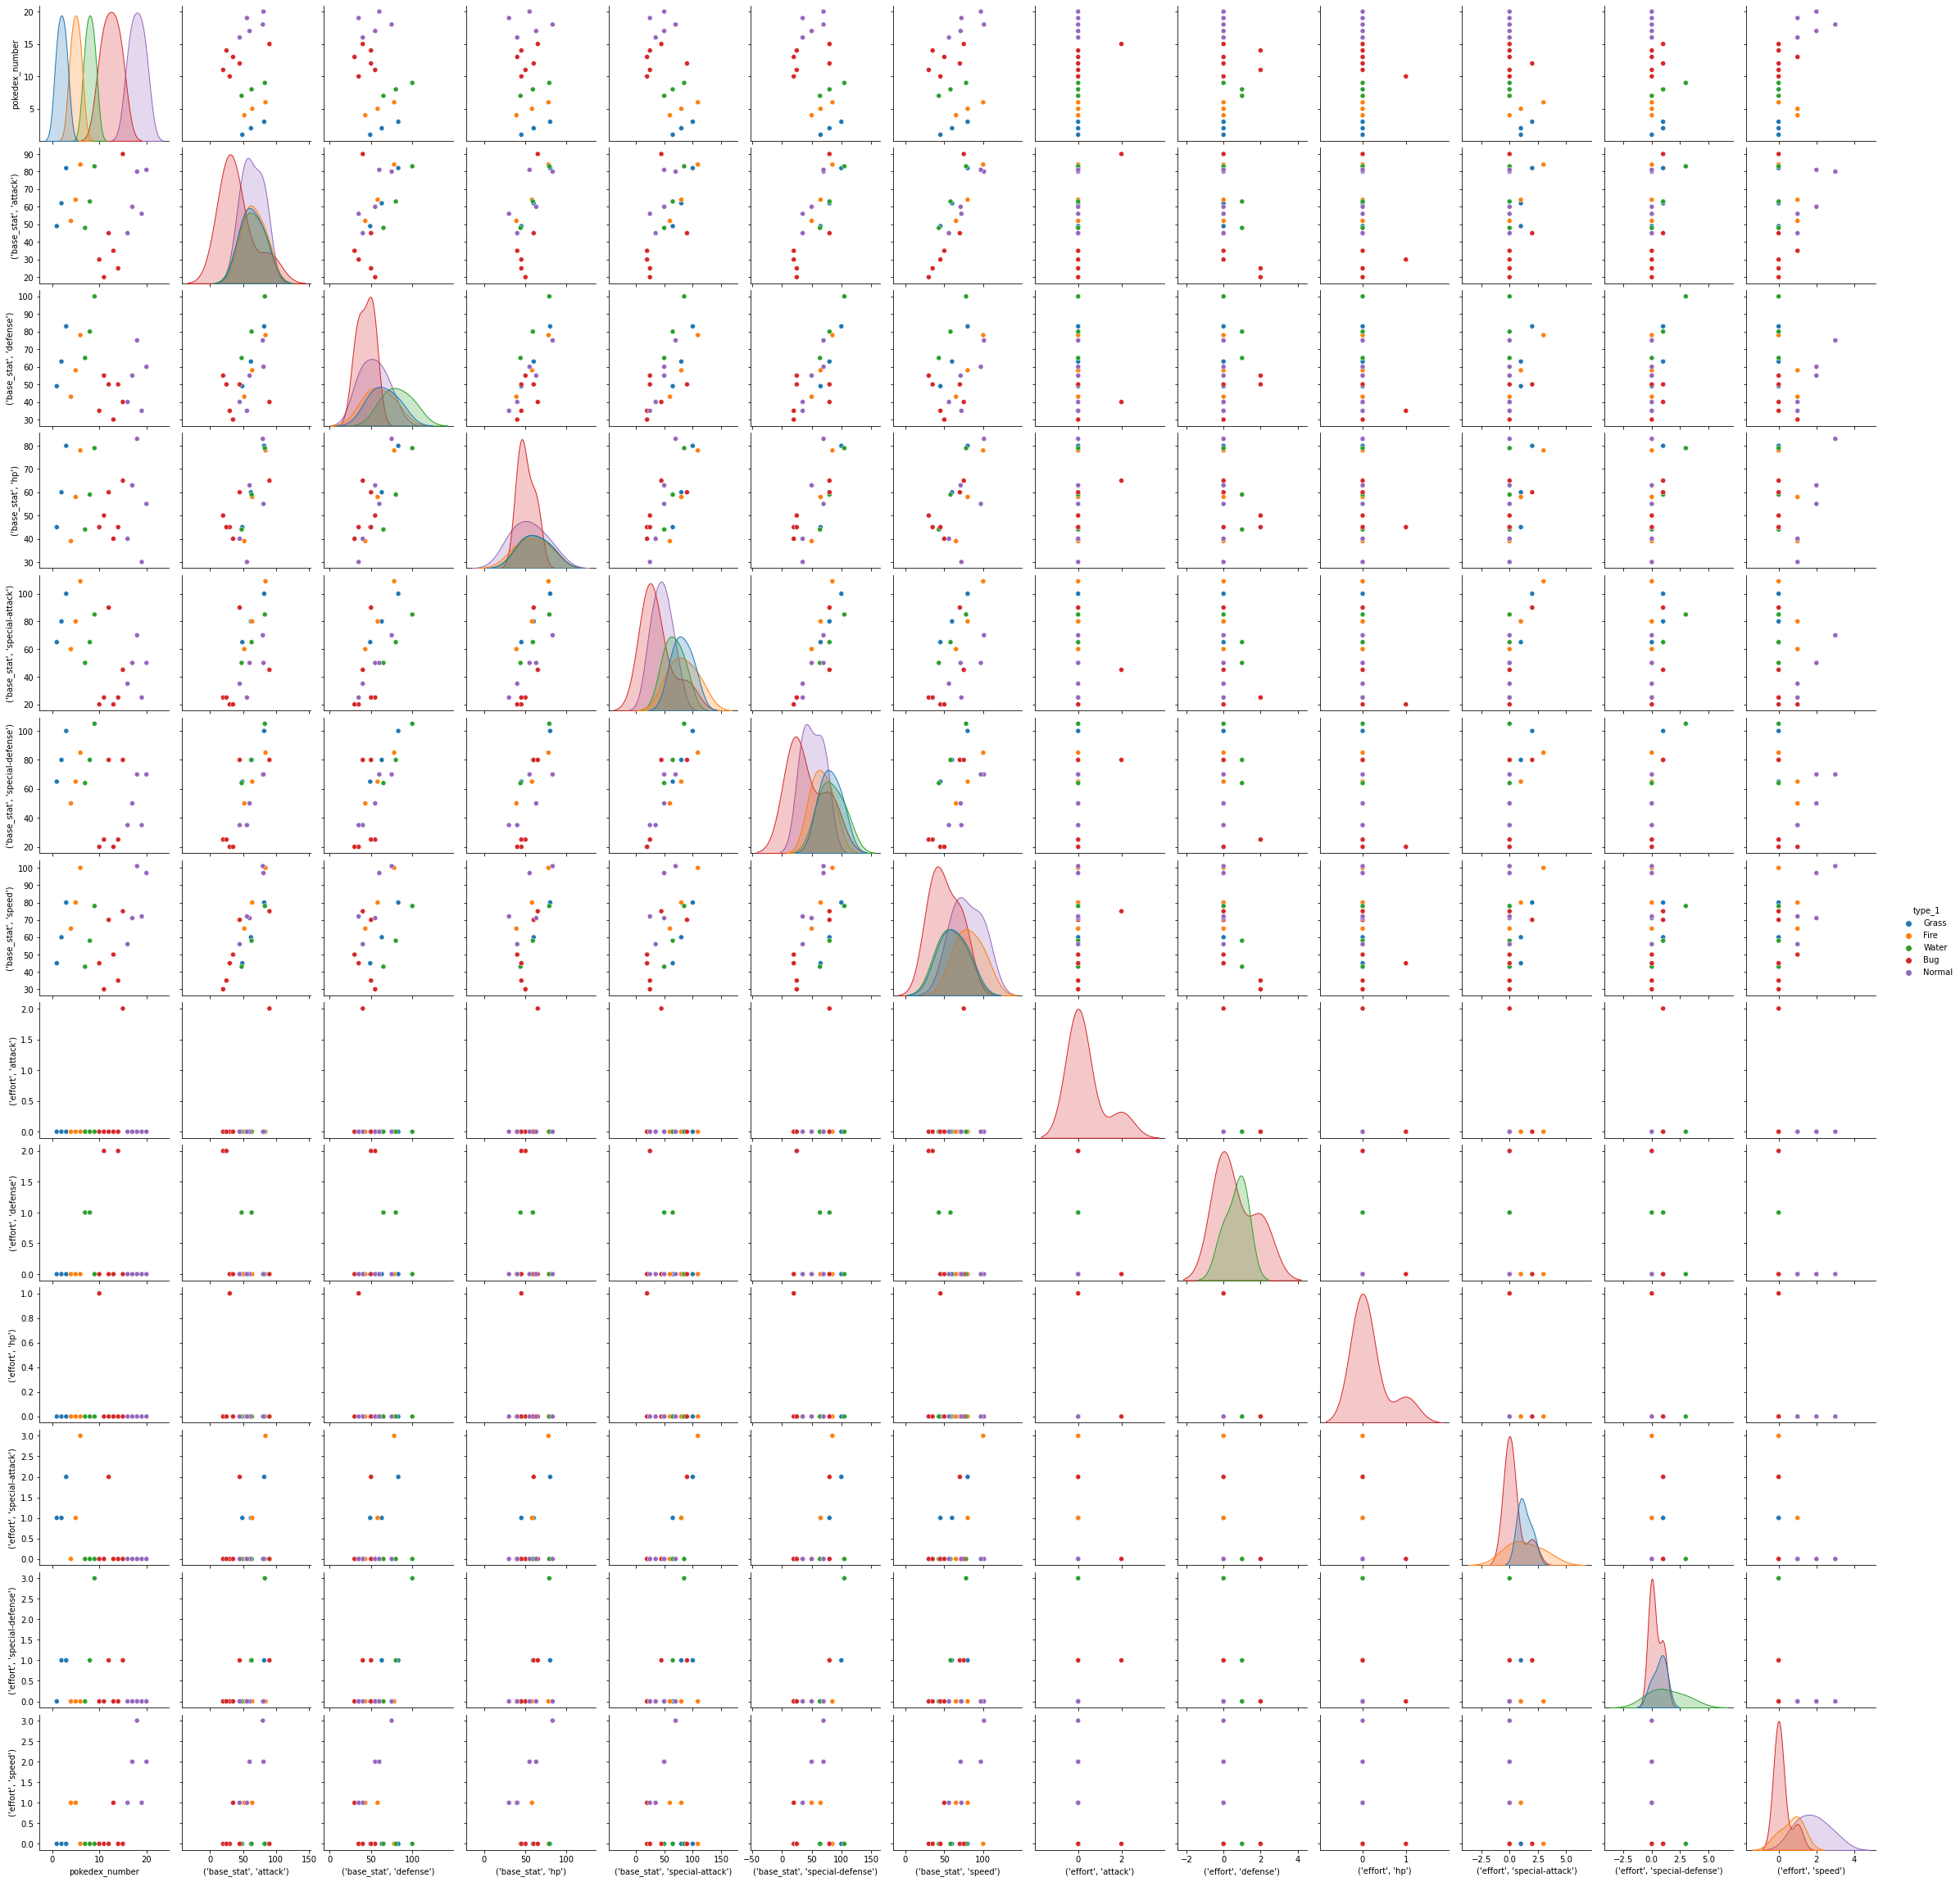